In [121]:
import numpy as np
import librosa
import os
from os import walk
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import datetime 
import pandas as pd

In [153]:
import librosa
import numpy as np

def get_chroma_vector(wav_file_path, target_duration=3):
    y, sr = librosa.load(wav_file_path, sr=None)
    current_duration = librosa.get_duration(y=y, sr=sr)
    
    # Calculez le facteur d'étirement ou de compression nécessaire
    time_stretch_factor = current_duration / target_duration
    
    # Étirez ou compressez le signal audio pour atteindre la durée cible
    y_stretched = librosa.effects.time_stretch(y,rate=time_stretch_factor)
    
    # Calculez le chromagramme à partir du signal modifié
    chroma = np.array(librosa.feature.chroma_stft(y=y_stretched, sr=sr))
    
    return chroma


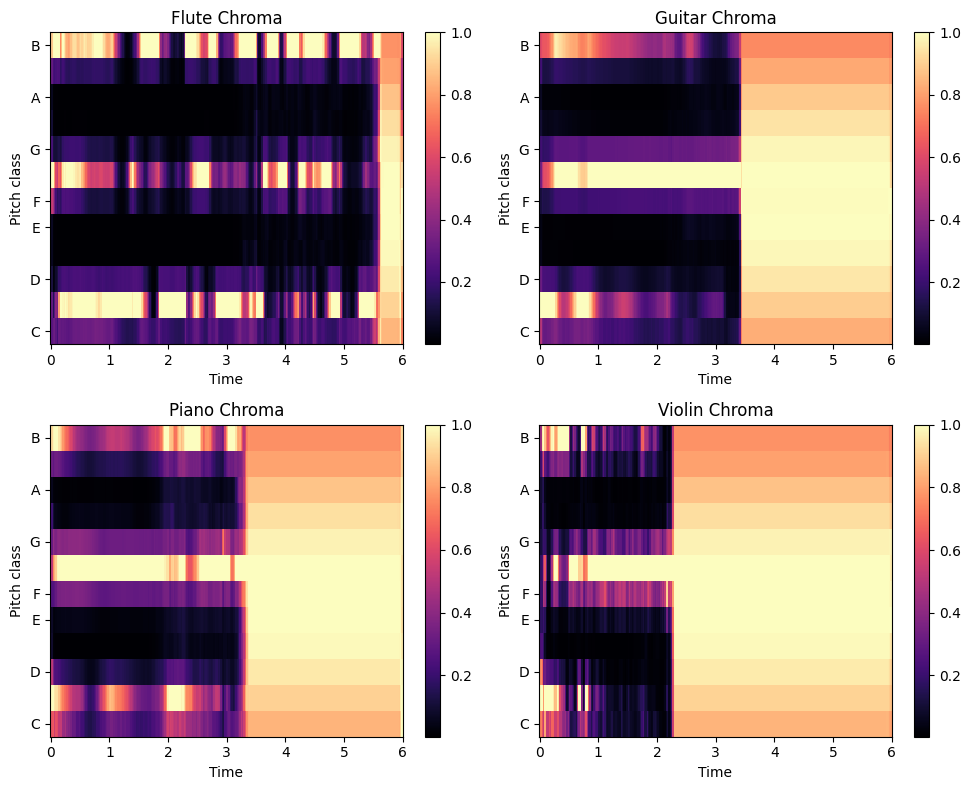

In [154]:
import matplotlib.pyplot as plt

# Obtenez les 4 chromagrammes (remplacez ces lignes par les données réelles que vous avez)
chroma1 = get_chroma_vector('Chords_generation/chords_wav/F_F#sus4.wav')
chroma2 = get_chroma_vector('Chords_generation/chords_wav/G_F#sus4.wav')
chroma3 = get_chroma_vector('Chords_generation/chords_wav/P_F#sus4.wav')
chroma4 = get_chroma_vector('Chords_generation/chords_wav/V_F#sus4.wav')

# Créez une figure avec une grille de 2x2 sous-plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Affichez chaque chromagramme dans un sous-plot
img1 = librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time', ax=axes[0, 0])
axes[0, 0].set_title('Flute Chroma')

img2 = librosa.display.specshow(chroma2, y_axis='chroma', x_axis='time', ax=axes[0, 1])
axes[0, 1].set_title('Guitar Chroma')

img3 = librosa.display.specshow(chroma3, y_axis='chroma', x_axis='time', ax=axes[1, 0])
axes[1, 0].set_title('Piano Chroma')

img4 = librosa.display.specshow(chroma4, y_axis='chroma', x_axis='time', ax=axes[1, 1])
axes[1, 1].set_title('Violin Chroma')

# Ajoutez une barre de couleur pour chaque sous-plot
fig.colorbar(img1, ax=axes[0, 0])
fig.colorbar(img2, ax=axes[0, 1])
fig.colorbar(img3, ax=axes[1, 0])
fig.colorbar(img4, ax=axes[1, 1])

# Ajustez l'espacement entre les sous-plots
plt.tight_layout()

# Affichez la figure
plt.show()


In [165]:
pd_chroma1 = pd.DataFrame(chroma1)
pd_chroma2 = pd.DataFrame(chroma2)
pd_chroma3 = pd.DataFrame(chroma3)
pd_chroma4 = pd.DataFrame(chroma4)

In [167]:
moyenne_par_colonne = pd_chroma1.mean()

# Sélectionnez les colonnes dont la moyenne est inférieure ou égale à 0.6
colonnes_a_conserver = moyenne_par_colonne[moyenne_par_colonne <= 0.6].index

# Créez un nouveau DataFrame en ne conservant que les colonnes sélectionnées
pd_chroma1_filtre = pd_chroma1[colonnes_a_conserver]

In [169]:
moyenne_par_colonne = pd_chroma2.mean()

# Sélectionnez les colonnes dont la moyenne est inférieure ou égale à 0.6
colonnes_a_conserver = moyenne_par_colonne[moyenne_par_colonne <= 0.6].index

# Créez un nouveau DataFrame en ne conservant que les colonnes sélectionnées
pd_chroma2_filtre = pd_chroma2[colonnes_a_conserver]

In [170]:
moyenne_par_colonne = pd_chroma3.mean()

# Sélectionnez les colonnes dont la moyenne est inférieure ou égale à 0.6
colonnes_a_conserver = moyenne_par_colonne[moyenne_par_colonne <= 0.6].index

# Créez un nouveau DataFrame en ne conservant que les colonnes sélectionnées
pd_chroma3_filtre = pd_chroma3[colonnes_a_conserver]

In [171]:
moyenne_par_colonne = pd_chroma4.mean()

# Sélectionnez les colonnes dont la moyenne est inférieure ou égale à 0.6
colonnes_a_conserver = moyenne_par_colonne[moyenne_par_colonne <= 0.6].index

# Créez un nouveau DataFrame en ne conservant que les colonnes sélectionnées
pd_chroma4_filtre = pd_chroma4[colonnes_a_conserver]

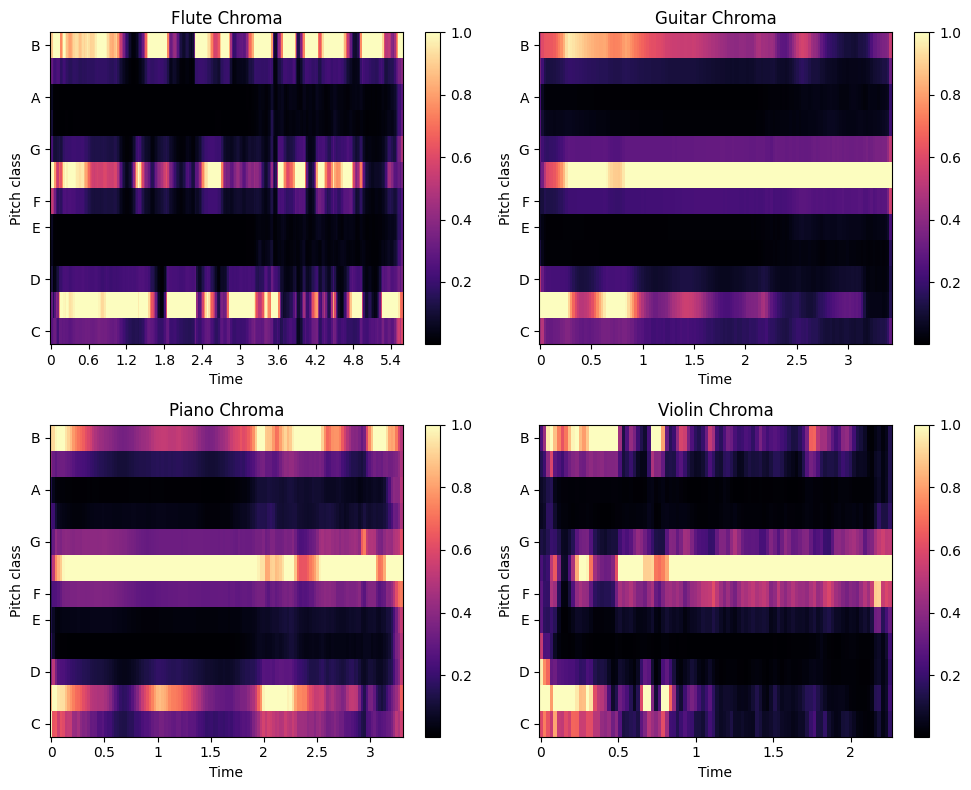

In [172]:
chroma_filtre1 = pd_chroma1_filtre.to_numpy()
chroma_filtre2 = pd_chroma2_filtre.to_numpy()
chroma_filtre3 = pd_chroma3_filtre.to_numpy()
chroma_filtre4 = pd_chroma4_filtre.to_numpy()


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Affichez chaque chromagramme dans un sous-plot
img1 = librosa.display.specshow(chroma_filtre1, y_axis='chroma', x_axis='time', ax=axes[0, 0])
axes[0, 0].set_title('Flute Chroma')

img2 = librosa.display.specshow(chroma_filtre2, y_axis='chroma', x_axis='time', ax=axes[0, 1])
axes[0, 1].set_title('Guitar Chroma')

img3 = librosa.display.specshow(chroma_filtre3, y_axis='chroma', x_axis='time', ax=axes[1, 0])
axes[1, 0].set_title('Piano Chroma')

img4 = librosa.display.specshow(chroma_filtre4, y_axis='chroma', x_axis='time', ax=axes[1, 1])
axes[1, 1].set_title('Violin Chroma')

# Ajoutez une barre de couleur pour chaque sous-plot
fig.colorbar(img1, ax=axes[0, 0])
fig.colorbar(img2, ax=axes[0, 1])
fig.colorbar(img3, ax=axes[1, 0])
fig.colorbar(img4, ax=axes[1, 1])

# Ajustez l'espacement entre les sous-plots
plt.tight_layout()

# Affichez la figure
plt.show()


In [173]:
def get_feature(file_path):
 # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  chroma_mean = chroma.mean(axis=1)

  feature = chroma_mean
  return feature

In [177]:
chroma_mean1 = chroma_filtre1.mean(axis=1)
chroma_mean2 = chroma_filtre2.mean(axis=1)
chroma_mean3 = chroma_filtre3.mean(axis=1)
chroma_mean4 = chroma_filtre4.mean(axis=1)

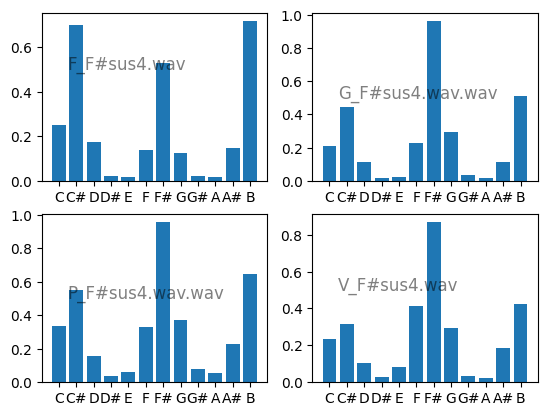

In [178]:
names = ['C', 'C#', 'D','D#','E','F','F#','G','G#','A','A#','B'] # nom des barres

values_f = chroma_mean1.tolist()
values_g = chroma_mean2.tolist()
values_p = chroma_mean3.tolist()
values_v = chroma_mean4.tolist()

plt.subplot(221)
plt.bar(names, values_f)
plt.text(0.5, 0.5, "F_F#sus4.wav", size=12, alpha=.5)

plt.subplot(222)
plt.bar(names, values_g)
plt.text(0.5,0.5, "G_F#sus4.wav.wav", size=12, alpha=.5)

plt.subplot(223)
plt.bar(names, values_p)
plt.text(0.5,0.5, "P_F#sus4.wav.wav", size=12, alpha=.5)

plt.subplot(224)
plt.bar(names, values_v)
plt.text(0.5,0.5, "V_F#sus4.wav", size=12, alpha=.5)

plt.show()


In [57]:
def extract_features(directory):
    features = []
    labels = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            feature = get_feature(file_path)
            label = file.split('_')[1].split('.')[0]
            features.append(feature)
            labels.append(label)

    return features, labels

In [58]:
dir = 'Chords_generation\chords_wav'
features, labels = extract_features(dir)

In [59]:
permutations = np.random.permutation(408)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

features = np.array(features)[permutations]
labels_encoded = np.array(labels_encoded)[permutations]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

In [61]:
predicted_accord_name = label_encoder.inverse_transform([y_train[0]])[0]
predicted_accord_name

'F#maj'

In [42]:
inputs = keras.Input(shape=(12), name="feature")
x = keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(200, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(103, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [43]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.RMSprop(),
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [44]:
model.fit(x=X_train.tolist(),y=y_train.tolist(),verbose=1, epochs=64)

Epoch 1/64
11/11 [==============================] - 1s 3ms/step - loss: 4.6590 - sparse_categorical_accuracy: 0.0061
Epoch 2/64
11/11 [==============================] - 0s 3ms/step - loss: 4.6122 - sparse_categorical_accuracy: 0.0123
Epoch 3/64
11/11 [==============================] - 0s 3ms/step - loss: 4.5830 - sparse_categorical_accuracy: 0.0307
Epoch 4/64
11/11 [==============================] - 0s 3ms/step - loss: 4.5461 - sparse_categorical_accuracy: 0.0429
Epoch 5/64
11/11 [==============================] - 0s 3ms/step - loss: 4.5021 - sparse_categorical_accuracy: 0.0706
Epoch 6/64
11/11 [==============================] - 0s 3ms/step - loss: 4.4486 - sparse_categorical_accuracy: 0.0951
Epoch 7/64
11/11 [==============================] - 0s 5ms/step - loss: 4.3902 - sparse_categorical_accuracy: 0.1380
Epoch 8/64
11/11 [==============================] - 0s 3ms/step - loss: 4.3156 - sparse_categorical_accuracy: 0.1534
Epoch 9/64
11/11 [==============================] - 0s 4ms/step 

In [45]:
score = model.evaluate(x=X_test.tolist(),y=y_test.tolist(), verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 14.63414579629898%
